In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/tmp/"
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_005_0320_tanh_hidden/" # tanh for hidden
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_0001_0320_relu_hidden/" # relu for hidden
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_0001_0322_tanh/"

# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_0001_0323_relu/"
# nonlin = "relu"

# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_005_0328_relu/"
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_005_0328_tanh/"

# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_005_0404_tanh/"
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_005_0404_relu/"

# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_005_0405_tanh/"
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_005_0405_relu/"

results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_01_0405_tanh/"
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_01_0405_relu/"

nonlin = "tanh"
# nonlin = "relu"

In [3]:
def plot_hist_output(epoch):
    vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch))
    print(vals.shape, vals.mean())
    plt.figure()
    plt.hist(vals, range=[-2.,2.], bins=150)
    plt.grid(True)
    
def plot_hist_hidden(epoch):
    vals = np.load(results_dir + "epoch_{}_h1_noise.npy".format(epoch))
    print(vals.shape, vals.mean())
    plt.figure()
    plt.hist(vals, range=[-2.,2.], bins=150)
    plt.grid(True)

def plot_hist_over_epochs(epochs):
    num_bins = 150
    for epoch in epochs:
        vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch))
        hist, _ = np.histogram(vals, range=[-2.,2.], bins=num_bins)
        xmin = np.min(vals)
        xmax = np.max(vals)
        x = np.linspace(-2, 2, num_bins)
        plt.plot(x, hist, label="Epoch {}".format(epoch))
        plt.xlim(-2.,2.)
        plt.legend()
    plt.grid(True)

def plot_hist_top_view_hidden(num_epochs):
    num_bins = 100
    points = 1000
    plt.figure(figsize=(10,5))
    for epoch in range(num_epochs):
        vals = np.load(results_dir + "epoch_{}_h1_noise.npy".format(epoch+1))
        if nonlin == "relu":
            hist, bins = np.histogram(vals, range=[-1.5,7.], bins=num_bins) # For relu
        elif nonlin == "tanh":
            hist, bins = np.histogram(vals, range=[-2.,2.], bins=num_bins) # For tanh
        else:
            assert 0, "Non-linearity not supported."
            
        total_points = np.sum(hist)
#         assert total_points == points, "Error:{}".format(total_points)
        
        i = 0
        colours = list()
        for b in range(bins.shape[0]-1):
            c = plt.cm.jet(hist[i]/float(total_points)*30)
            colours.append(c)
            i += 1
            
        epoch_vals = np.tile(epoch, bins[:num_bins].shape)
        plt.scatter(epoch_vals, bins[:num_bins], color=colours)
    plt.xlabel("Epoch")
    plt.ylabel(r"PDF of $T_1(k)$")

def plot_hist_top_view_output(num_epochs):
    num_bins = 100
    points = 1000
    plt.figure(figsize=(10,5))
    for epoch in range(num_epochs):
        vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch+1))
        hist, bins = np.histogram(vals, range=[-2.,2.], bins=num_bins)
        total_points = np.sum(hist)
#         assert total_points == points, "Error:{}".format(total_points)
        
        i = 0
        colours = list()
        for b in range(bins.shape[0]-1):
            c = plt.cm.jet(hist[i]/float(total_points)*30)
            colours.append(c)
            i += 1
            
        epoch_vals = np.tile(epoch, bins[:num_bins].shape)
        plt.scatter(epoch_vals, bins[:num_bins], color=colours)
    plt.xlabel("Epoch")
    plt.ylabel(r"PDF of $T_2(k)$")

def plot_acc():
    vals = np.load(results_dir + "accuracies.npy")
    plt.figure(figsize=(10,5))
    plt.plot(vals)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    
def plot_mutual_info():
    vals1 = np.load(results_dir + "mutual_information_layer1.npy")
    vals2 = np.load(results_dir + "mutual_information_layer2.npy")
    plt.figure(figsize=(10,5))
    plt.plot(vals1, label="Layer 1")
    plt.plot(vals2, label="Layer 2")
    plt.ylabel("Mutual Information")
    plt.xlabel("Epoch")
    plt.legend()
    plt.grid(True)

((1000, 1), -0.0009423714)


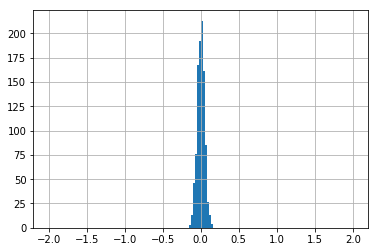

In [4]:
plot_hist_output(1)

((1000, 1), 0.008550682)


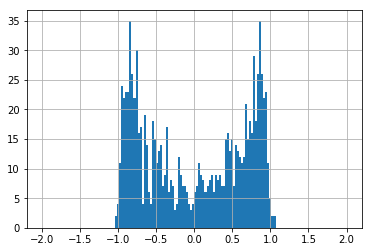

In [5]:
plot_hist_output(15)

((1000, 1), -0.018552404)


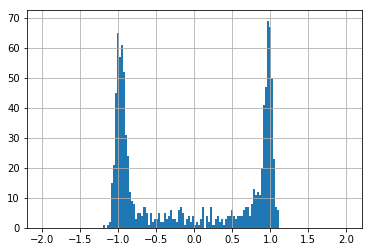

In [6]:
plot_hist_output(200)

((1000, 1), -0.0035002618)


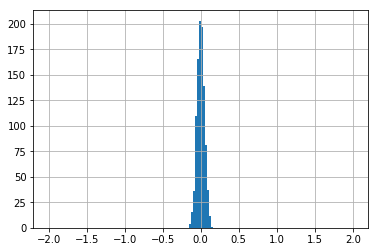

In [7]:
plot_hist_hidden(1)

((1000, 1), -0.010457565)


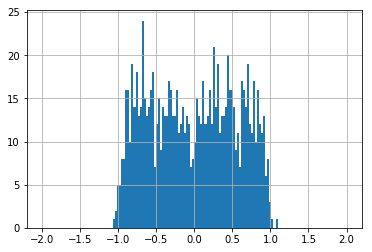

In [8]:
plot_hist_hidden(15)

((1000, 1), -0.0023109054)


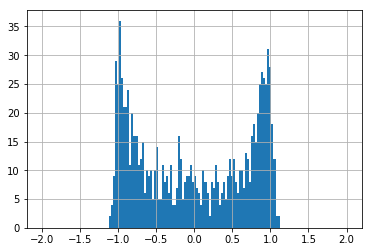

In [9]:
plot_hist_hidden(300)

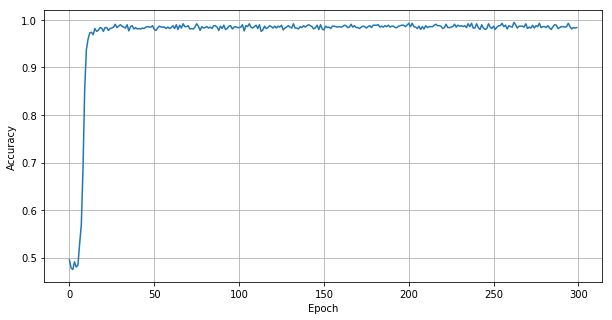

In [10]:
plot_acc()

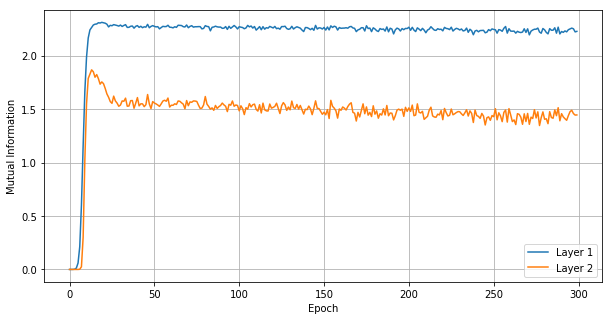

In [11]:
plot_mutual_info()
plt.savefig("/home/nclkong/information_bottleneck/figures/mi_single_gaussian_{}.png".format(nonlin))

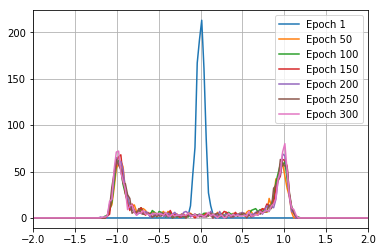

In [12]:
plot_hist_over_epochs([1,50,100,150,200,250,300])

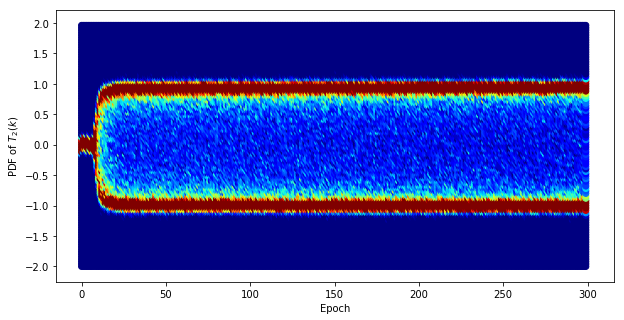

In [13]:
plot_hist_top_view_output(300)
plt.savefig("/home/nclkong/information_bottleneck/figures/pdf_single_gaussian_output_{}.png".format(nonlin))

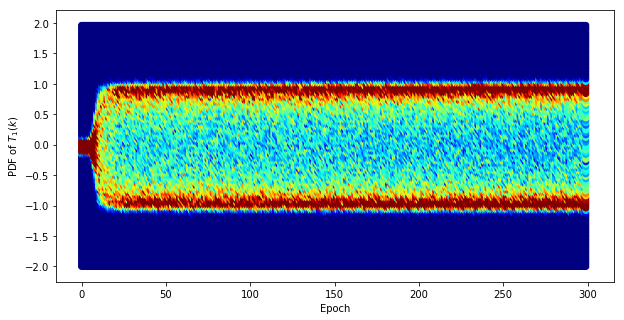

In [14]:
plot_hist_top_view_hidden(300)
plt.savefig("/home/nclkong/information_bottleneck/figures/pdf_single_gaussian_hidden_{}.png".format(nonlin))